# 第7章 内建的控制结构
Scala只有为数不多的几个内建的控制结构。这些控制结构包括：i f、while、for、try、match和函数调用。Scala的内建控制结构之所以这么少，归功于它从一开始就引入了函数字面量。不同于在基础语法中不断地添加高级控制结构这种做法，Scala将它们归口到类库当中（第9章将会展示具体做法）。本章主要介绍的就是这些内建的控制结构。

你会注意到一点，**那就是Scala所有的控制结构都返回某种值作为结果**。这是函数式编程语言采取的策略，程序被认为是用来计算出某个值，因此程序的各个组成部分也应该计算出某个值。你也可以将这种方式看作在指令式编程语言中已经存在的那种趋势的逻辑终局。在指令式编程语言中，函数调用可以返回某个值，即便被调用的函数在过程中更新了某个传入的输出变量，这套机制也是能正常运作的。除此之外，指令式编程语言通常都提供了三元操作符（比如C、C++和Java的？:），其行为跟i f几乎没差别，只是会返回某个值， Scala也采纳了这样的三元操作模型，不过把它称作i f。换句话说，Scala的if可以有返回值。Scala更进一步让for、try和match也都有返回值。

程序员可以用这些返回值来简化他们的代码，就像他们能用函数的返回值一样。缺少了这个机制，程序员必须创建临时的变量，这些变量仅仅是用来保持那些在控制结构内部计算出来的结果。去掉这些临时变量不仅让代码变得更简单，同时还避免了很多由于在某个分支设置了变量而在另一个分支中忘记设置带来的bug。

总体而言，Scala这些基础的控制结构虽然看上去很小，却提供了本质上跟指令式编程语言相同的功能。不仅如此，它们通过确保每段代码都有返回值让你的代码变得更短。为了向你展示这一点，我们将对Scala的每一个控制结构做详细的讲解。

## 7.1 if表达式
Scala的if跟很多其他语言一样，首先测试某个条件，然后根据条件是否满足来执行两个不同代码分支当中的一个。下面给出了一个以指令式风格编写的常见例子：

In [ ]:
val args = Array("7-ControlMethodInScala.ipynb")

var filename = "default.txt"
if(!args.isEmpty)
    filename = args(0)

这段代码定义了一个变量filename并初始化成默认值，然后用if表达式检查是否有入参传给这个程序。如果有，就用传入的入参改写变量的值。如果没有入参，则保留变量的默认值。

这段代码可以写得更精简，因为（我们在第2章的第3步有讲到）Scala的if是一个能返回值的表达式。示例7.1给出了不使用var达到跟前一例同样效果的做法：

In [ ]:
val filename =
    if(!args.isEmpty) args(0)
    else "default.txt"

这一次，if有两个分支。如果 args不为空，则选取第一个元素args（0）；否则，选取默认值。if表达式的返回值是被选取的值，这个值进而被用于初始化变量filename。这段代码比前面给出的稍微短了一些，但真正的优势在于它用的是val而不是var。使用val是函数式的风格，就像Java的final变量那样，有助于你编写出更好的代码。它也告诉读这段代码的人，这个变量一旦初始化就不会改变，省去了扫描该变量整个作用域的代码来搞清楚它会不会变的必要。

使用val而不是var的另一个好处是**对等式推理**（equational reasoning）的支持。引入的变量等于计算出它的值的表达式（假定这个表达式没有副作用）。因此，在任何你打算写变量名的地方，都可以直接用表达式来替换。比如，可以不用println（filename），而是写成这样：

In [ ]:
println(if(!args.isEmpty) args(0) else "default.txt")

这是你的选择，两种方式都行。使用val让你可以在代码演进过程中安全地执行这种重构。

只要有机会，尽可能使用val，它们会让你的代码更易读也更易于重构。

## 7.2 while循环

Scala的while循环跟其他语言用起来没多大差别。它包含了一个条件检查和一个循环体，只要条件检查为真，循环体就会一遍接着一遍地执行。来看示例7.2：

In [ ]:
def gcdLoop(x: Long, y:Long): Long = {
    var a = x
    var b = y
    while(a !=0 ){
        val temp = a
        a = b % a
        b = temp
    }
    b
}

gcdLoop(27,12)

Scala也有do-while循环，它跟while循环类似，只不过它是在循环体之后执行条件检查而不是在循环体之前。示例7.3给出了一段用do-while来复述从标准输入读取的文本行，直到读到空行为止的Scala脚本：

In [ ]:
var line = ""
do {
    line = readLine()
    println("Read: " + line)
} while (line != "")

while和do-while这样的语法结构，我们称之为“循环”而不是表达式，因为它们并不会返回一个有意义的值。返回值的类型是Unit。实际上存在这样一个（也是唯一的一个）类型为Unit的值，这个值叫作单元值（unit value），写作（）。存在这样一个（）值，是Scala的Unit跟Java的void的不同。可以尝试在解释器中键入：

In [ ]:
def greet() = {println("hi")}
() == greet()

由于greet的方法体之前没有等号，greet被定义为一个结果类型为Unit的过程。[1]这样一来，greet返回单元值（）。这一点在接下来的一行中得到了印证：对greet的结果和单元值（）判等，得到true。
另一个相关的返回单元值的语法结构是对var的赋值。例如，当你尝试在Scala中像Java（或C/C++）的while循环惯用法那样使用while循环时，会遇到问题：

In [ ]:
var line = ""
while ((line = readLine()) != "")//并不可行，这个循环永远结束不了
    println("Read: " + line)

这段代码在编译时，Scala编译器会给出一个警告：用！=对类型为U n i t的值和String做比较将永远返回true。在Java中，赋值语句的结果是被赋上的值（在本例中就是从标准输入读取的一行文本），**而在Scala中赋值语句的结果永远是单元值（）**。因此，赋值语句“line = readLine（）”将永远返回（），而不是＂＂。这样一来，w h i l e循环的条件检查永远都不会为false，循环将无法终止。

由于while循环没有返回值，纯函数式编程语言通常都不支持。这些语言有表达式，而不是循环。尽管如此，Scala还是包括了while循环，因为有时候指令式的解决方案更易读，尤其是对于那些以指令式编程风格为主的程序员而言。举例来说，如果你想要编一段重复某个处理逻辑直到某个条件发生变化这样的算法时，while循环能够直接表达出来，而函数式的替代方案（可能用到了递归）对于某些读者而言就没那么直观了。

例如，示例7.4给出了一个计算两个数的最大公约数的另一种实现方式。[2]给x和y同样的两个值，示例7.4的gcd函数将返回跟示例7.2中的gcdLoop函数相同的结果。这两种方案的区别在于gcdLoop是指令式风格的，用到了var和while循环，而gcd是更加函数式风格的，用到了递归（gcd调用了自己），并且不需要var。

In [ ]:
def gcd(x: Long, y: Long): Long = 
    if(y == 0) x else gcd(y,x%y)

gcd(27,12)

一般来说，我们建议你像挑战var那样挑战代码中的while循环。[3]事实上， while循环和var通常都是一起出现的。由于while循环没有返回值，要想对程序产生任何效果，while循环通常要么更新一个var要么执行I/O。先前的gcdLoop示例已经很好地展示了这一点。在这个while循环执行过程中，它更新了var变量a和b。因此，我们建议你对代码中的while循环保持警惕。如果对于某个特定的while或do-while循环，找不到合理的理由来使用它，那么应该尝试采用其他方案来完成同样的工作。

## 7.3 for表达式
Scala的f o r表达式是用于迭代的瑞士军刀，它让你以不同的方式组合一些简单的因子来表达各式各样的迭代。它可以帮助我们处理诸如遍历整数序列的常见任务，也可以通过更高级的表达式来遍历多个不同种类的集合，根据任意条件过滤元素，产出新的集合。

**遍历集合**  
用for能做的最简单的事，是遍历某个集合的所有元素。例如，示例7.5展示了一组打印出当前目录所有文件的代码。I/O操作用到了Java API。首先，我们对当前目录（＂.＂）创建一个java.io.File对象，然后调用它的listFiles方法。这个方法返回一个包含File对象的数组，这些对象分别对应当前目录中的每个子目录或文件。我们将结果数组保存在filesHere变量中。


In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere)
    println(file)

通过“file <- filesHere”这样的生成器（generator）语法，我们将遍历filesHere的元素。每一次迭代，一个新的名为file的val都会被初始化成一个元素的值。编译器推断出文件的类型为File，这是因为filesHere是个Array[File]。每做一次迭代，for表达式的代码体println（file）就被执行一次。由于File的toString方法会返回文件或目录的名称，这段代码将会打印出当前目录的所有文件和子目录。

for表达式的语法可以用于任何种类的集合，而不仅仅是数组。[4]Range（区间）是一类特殊的用例，在表5.4中（91页）简略地提到过。可以用“1 to 5”这样的语法来创建Range，并用for来遍历它们。以下是一个简单的例子：

In [ ]:
for (i <- 1 to 4)
    println("Iteration " + i)

如果你不想在被遍历的值中包含区间的上界，可以用until而不是to：

In [ ]:
for (i <- 1 until 4)
    println("Iteration " + i)

在Scala中像这样遍历整数是常见的做法，不过跟其他语言比起来，要少一些。在其他语言中，你可能会通过遍历整数来遍历数组，就像这样：

In [ ]:
for (i <- 0 to filesHere.length -1)
    println(filesHere(i))

这个for表达式引入了一个变量i，依次将0到filesHere.length - 1之间的每个整数值赋值给它，每次对i赋完值以后，filesHere的第i个元素都被提取出来做相应的处理。

在Scala中这类遍历方式不那么常见的原因是可以直接遍历集合。这样做了以后，你的代码会更短，也避免了很多在遍历数组时会遇到的偏一位（offby-one）的错误。应该以0还是1开始？应该对最后一个下标后加上-1、+1还是什么都不加？这些疑问很容易回答，但同时也很容易答错。完全避免回答这些问题无疑是更安全的做法。

**过滤**  
有时你并不想完整地遍历集合，你想把它过滤成一个子集。这时可以给for表达式添加过滤器（filter），过滤器是for表达式的圆括号中的一个if子句。举例来说，示例7.6的代码仅列出当前目录中以“.scala”结尾的那些文件：

In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere if file.getName.endsWith(".ipynb"))
    println(file)

也可以用如下代码达到同样的目的：

In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere)
    if (file.getName.endsWith(".ipynb"))
        println(file)

这段代码跟前一段交出的输出没有区别，可能看上去对于指令式编程背景的程序员来说更为熟悉。这种指令式的代码风格只是一种选项（不是默认和推荐的做法），因为这个特定的for表达式被用作打印的副作用，其结果是单元值（）。稍后你将看到，for表达式之所以被称作“表达式”，是因为它能返回有意义的值，一个类型可以由for表达式的<-子句决定的集合。

可以随意包含更多的过滤器，直接添加if子句即可。例如，为了让我们的代码具备额外的防御性，示例7.7的代码只输出文件名，不输出目录名。实现方式是添加一个检查file的isFile方法的过滤器。


In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere 
     if file.isFile
     if file.getName.endsWith(".ipynb"))
    println(file)

**嵌套迭代**  
如果你添加多个<-子句，你将得到嵌套的“循环”。例如，示例7.8中的for表达式有两个嵌套迭代。外部循环遍历filesHere，内部循环遍历每个以.scala结尾的file的fileLines（file）。

如果你愿意，也可以使用花括号而不是圆括号来包括生成器和过滤器。这样做的一个好处是可以在需要时省去某些分号，因为Scala编译器在圆括号中并不会自动推断分号（参考4.2节）。


In [ ]:
def fileLines(file: java.io.File) = 
    scala.io.Source.fromFile(file).getLines().toList

def grep(pattern: String) =
    for(
        file <- filesHere
        if file.getName.endsWith(".ipynb");
        line <- fileLines(file)
        if line.trim.matches(pattern)
    )println(file + ": " + line.trim)

val filesHere = (new java.io.File(".")).listFiles
grep(".*gcd.*")

**中途（mid-stream）变量绑定**  
你大概注意到前一例中line.trim重复了两遍。这并不是一个很轻的计算，因此你可能想最好只算一次。可以用=来将表达式的结果绑定到新的变量上。被绑定的这个变量引入和使用起来都跟val一样，只不过去掉了val编辑案子。示例7.9给出了一个例子。


In [ ]:
def fileLines(file: java.io.File) = 
    scala.io.Source.fromFile(file).getLines().toList

def grep(pattern: String) =
    for{
        file <- filesHere
        if file.getName.endsWith(".ipynb")
        line <- fileLines(file)
        trimmed = line.trim
        if trimmed.matches(pattern)
    }println(file + ": " + trimmed)

val filesHere = (new java.io.File(".")).listFiles
grep(".*gcd.*")

在示例7.9中，for表达式的中途，引入了名为trimmed的变量，这个变量被初始化为line.trim的结果。for表达式余下的部分则在两处用到了这个新的变量，一次在if中，另一次在println中。

**产出一个新的集合**  
虽然目前为止所有示例都是对遍历到的值进行操作然后忘掉它们，也完全可以在每次迭代中生成一个可以被记住的值。具体做法是在for表达式的代码体之前加上关键字yield。例如，如下函数识别出.scala文件并将它们保存在数组中：

In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere 
     if file.isFile
     if file.getName.endsWith(".ipynb")
    ) yield file
    

for表达式的代码体每次被执行，都会产出一个值，本例中就是file。当for表达式执行完毕后，其结果将包含所有交出的值，包含在一个集合当中。结果集合的类型基于迭代子句中处理的集合种类。在本例中，结果是Array[File]，因为filesHere是个数组，而交出的表达式类型为File。

要小心yield关键字的位置。for-yield表达式的语法如下：
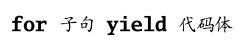
yield关键字必须出现在整个代码体之前。哪怕代码体是由花括号包起来的，也要将yield放在花括号之前，而不是在代码块最后一个表达式前面。避免像这样使用yield：

In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere if file.getName.endsWith(".ipynb")){
    yield file //语法错误
}

举例来说，示例7.10里的f o r表达式首先将包含当前目录所有文件的名为filesHere的Array[File]转换成一个只包含.scala文件的数组。对每一个文件，再用fileLines方法（参见示例7.8）的结果生成一个Iterator[String]。Iterator提供的next和hasNext方法，可以用来遍历集合中的元素。这个初始的迭代器又被转换成另一个Iterator[String]，这一次只包含那些包含子串＂for＂的被去边的字符串。最后，对这些字符串再交出其长度的整数。这个for表达式的结果是包含这些长度整数的Array[Int]。

In [ ]:
def fileLines(file: java.io.File) = 
    scala.io.Source.fromFile(file).getLines().toList

def grep(pattern: String) =
    for{
        file <- filesHere
        if file.getName.endsWith(".log")
        line <- fileLines(file)
        trimmed = line.trim
        if trimmed.matches(pattern)
    }println(file + ": " + trimmed)


val filesHere = (new java.io.File(".")).listFiles

val forLineLengths =
    for{
        file <- filesHere
        if file.getName.endsWith(".log")
        line <- fileLines(file)
        trimmed = line.trim
        if trimmed.matches(".*error.*")
    } yield trimmed.length


grep(".*error.*")

示例7.10 用for表达式将Array[File]转换成Array[Int]

至此，你已经看到了Scala的for表达式的所有主要功能特性，不过我们讲得比较快，在第23章给出了对for表达式更完整的讲解。